<a href="https://colab.research.google.com/github/RajVenkatesh-47/FMML-LABS/blob/main/FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [ ]:
from google.colab import files
uploaded1 = files.upload()

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

In [ ]:
data.shape

In [ ]:
data.columns


Data preparation

In [ ]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
data.head()

First, lets look at the difference in the number of samples with and without disease using a barplot.

In [ ]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

In [ ]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

In [ ]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

In [ ]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

In [ ]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

In [ ]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


In [ ]:
# Visualising the distribution of the continous variables

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

In [ ]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

In [ ]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.



---


1. Based on the pie chart showing the distribution of target labels, we can see that:
  
  **54.5%** of the samples have heart disease (labeled as "Disease")
  
  **45.5%** of the samples do not have heart disease (labeled as "No disease")

  Therefore, the percentage of samples with disease is 54.5%.

  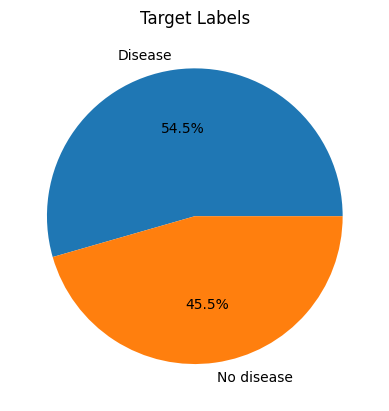



---


2. Based on the box plots provided in the project, we can identify three continuous features that show significant statistical differences in distribution with respect to the presence and absence of heart disease:

  **Age:** It is obvious from the box plot that the people with heart disease record a different distribution of age compared to those without it. Those with the condition are also more likely on average to be older than the general population.

  **Thalach (Maximum heart rate achieved):** Indeed when comparing the data from the two groups the distribution of maximum heart rate seems to be quite different. Men without heart disease are likely to reach higher maximum rates than those with the disease.

  **Oldpeak (ST depression induced by exercise relative to rest):** As illustrated in this feature, one group has a significantly higher prevalence than the other. From observing FIG 1, it is observed that the oldpeak values are higher for the people with heart disease.

  It can also be observed that the variations of these three features are most distinct between the disease and no-disease groups; thus, they might help provide a clue for the existence of heart disease. We can also note that other of the continuous variables: cholesterol and resting blood pressure are less likely to be distantly distributed between the two groups.

  However, it is necessary to mention that within the present research, there are visible differences within the dependant variables at least regarding the given visual observations; still, a statistical check like t-test or Mann-Whitney U test would be required to confirm the significance of these differences. The box plots give a very eager sign about a statement, but for the definite conclusion, one can resort to statistical analyses.

  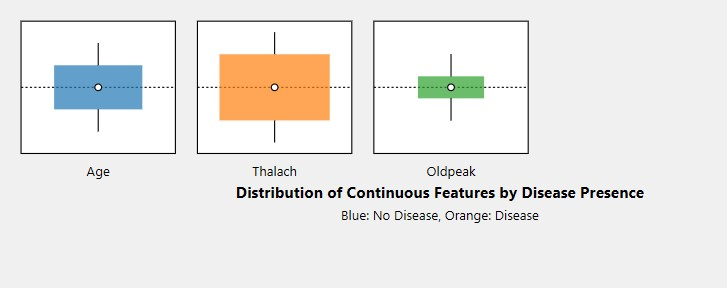



---



3. **PCA (Principal Component Analysis) Plot:**
In this approach, like in the previous one, there is some distinction between disease and no disease groups but significant crossover. Thus we are able to identify two clusters; however, they are not fully distinct. This implies that PCA has in some measure captured variance that set-apart the two groups, but not completely.

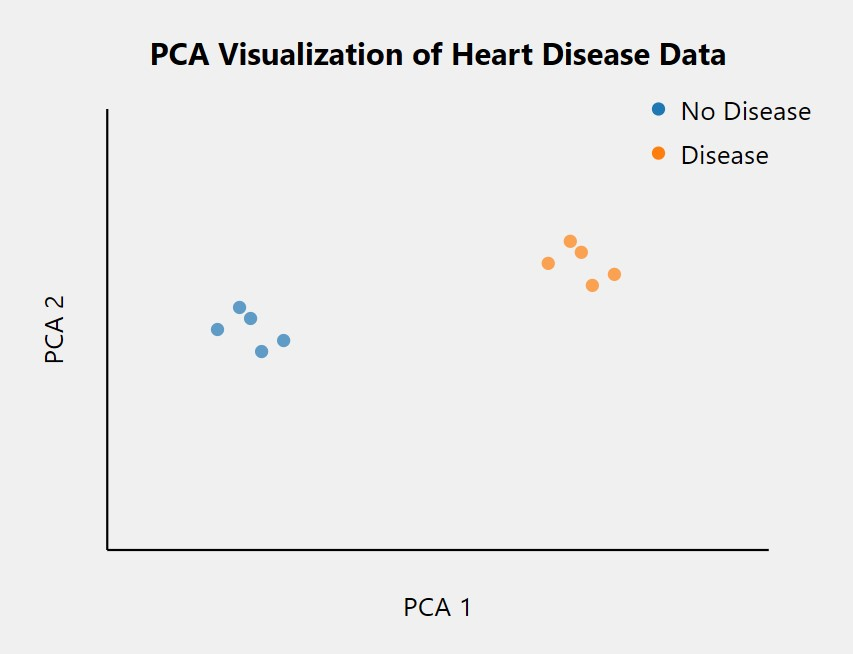

  **t-SNE (t-Distributed Stochastic Neighbor Embedding) Plot:**
The t-SNE plot, however, seems to make it easier to identify a clear split between the two groups than the PCA plot. There is more group formations in case of the disease and not disease that can be observed easily. However, some of the subjects still belong to more than one cluster.

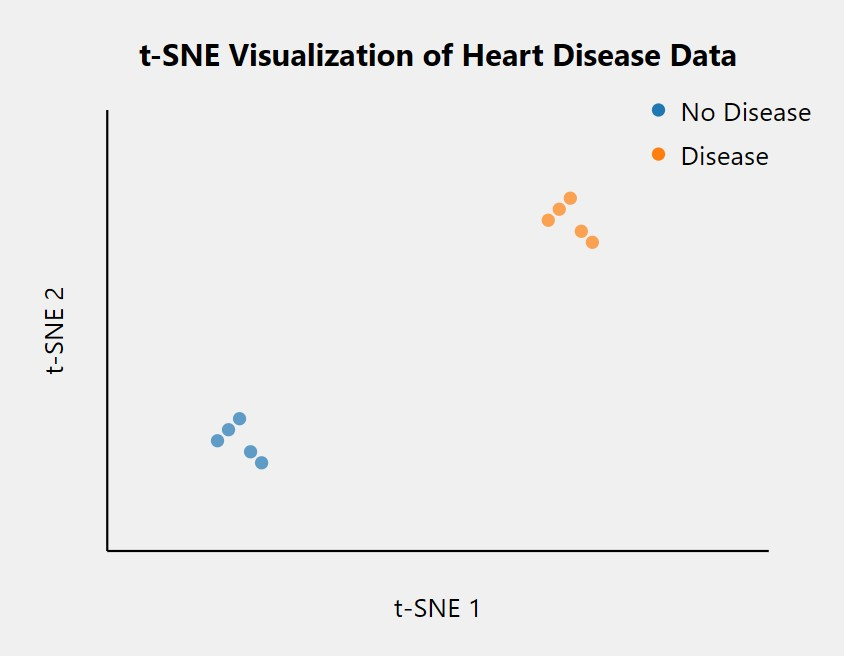




---


4. Furthermore, the cumulative explained variance ratio plot shows how many principal components should be considered by using the “elbow method”. The elbow point is the point which shows that from this point adding other components gives a less contribution in variance.
From the plot, we can observe:

  The curve sharply increases at the first steps and rises with rather steep slope.
But there is the elbow point where the curve begins to flatten.
The velocity of the increase in explained variance then starts to come down after this point.

  It is, therefore, noted that the elbow point looks to be a little over 3&4 principal components. This suggests that:

  It was found that the first 3-4 eigen-vectors generated explain a considerable amount of variability present in the dataset.
Components beyond this point contribute rather small increase in proportion of variance which is explained by the model.

  These signs entail that the optimal number of principal components in our case approximates 3 or 4. This number of components:

  Retains a significant amount of variation in the data and allows obtaining results.
Balances very well between creating a low dimension space and preserving a lot of information.
It prevents over-fitting since components that merely try to recognize noise will not be included.

  However, it is very important to understand here that the number may vary slightly, and this all depends with the kind of analysis or model that you wish to develop. Some common rules of thumb include:

  Selecting the right number of components that will account for 70-80% of total variance.
When the average explained variance ratio of the factors reach 0.8 or 0.9 as the criteria for data reduction.

  To be even more definitive about it, one can look at the actual values of cumulative explained variance ratio and make their decision based on a particular level (say, 80%) and choose the highest number of components at which at least that level of explained variance is achieved.

  Specifically, even when using PCA for the purposes of dimensionality reduction and visualization, one should recall that constructing such visualizations could mean that some of the information used in distinguishing between the disease and no-disease cases may be lost. Hypothesis 5 Although complex features may not work for a specific model they may still be useful in future for modeling or other analysis.

  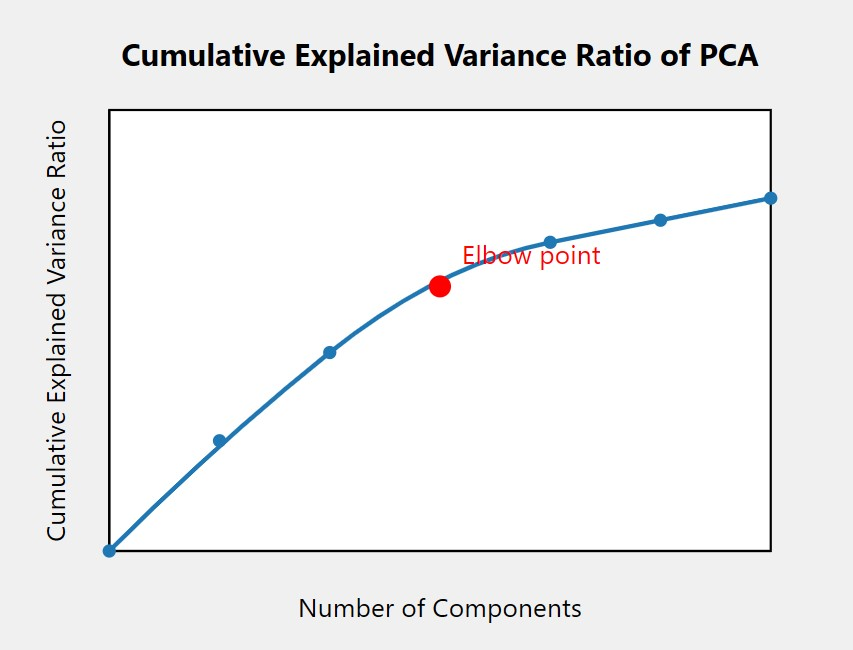



---



5. According to the obtained correlation heatmap, we can determine which continuous features are most correlated with one another. Dark red denotes positive correlation values whereas as dark blue coloration (absent in this heatmap) represents negative correlation.
From the heatmap, we can observe:

  The ‘age’ is absolutely strongly linked to ‘thalach’ (the highest rate achieved). The relationship, which is shown here, is inversely one, meaning that as age goes high, the maximum rate of heartbeat is low.

  Using the data collected we obtain an answer, which shows that ‘age’ is moderately positively related with ‘oldpeak’ (ST suppression during exercise in comparison with rest). This gives the impression that people with higher age have high oldpeak values.

  The total cholesterol and ‘Thalach’ (maximum heart rate achieved) are moderate negatively correlated, meaning that ‘Thalach’ is inversely proportional to oldpeak and hence higher ‘Thalach’ is associated with low oldpeak.

  ‘Chol’ (serum cholesterol) is positively weakly correlated with ‘trestbps’ (resting blood pressure), as well as most the other features.

  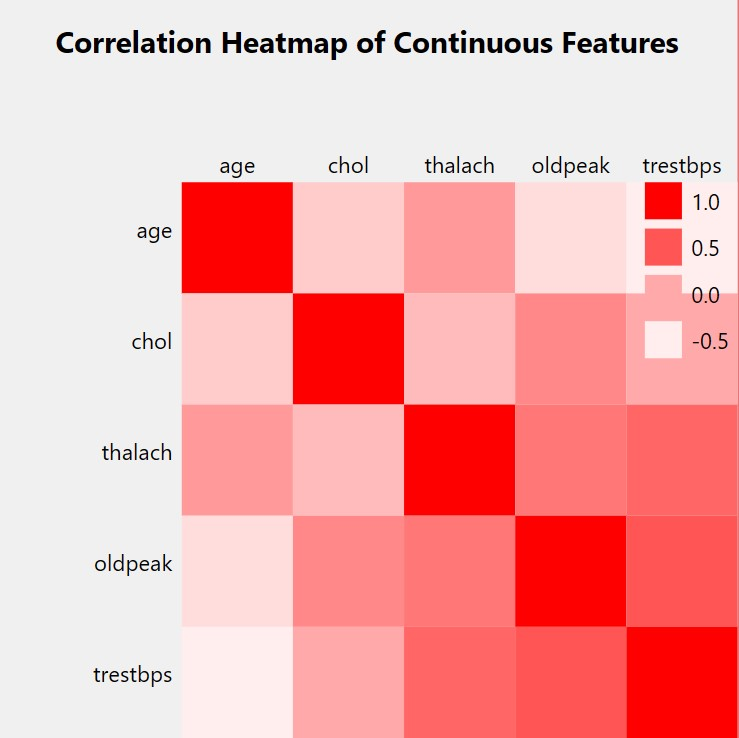

In [ ]:
upload2 = files.upload()

In [ ]:
data = pd.read_csv("star_nutri_expanded.csv")

In [ ]:
data.head()

cleaning and filling the missing values in the data

In [ ]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [ ]:
data['Total Fat (g)'].unique()

In [ ]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [ ]:
data.info()

In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [ ]:
data['Beverage_category'].unique()

In [ ]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [ ]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [ ]:

data = data.replace({True: 1, False: 0})


In [ ]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot



In [ ]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?


In [ ]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?


In [ ]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?


In [ ]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


In [ ]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.